In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/74cb417c-24ca-43b2-897a-8c310636ac22___Crnl_L.Mold 7149.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/05205449-e0d0-4d2f-a2fb-6f1fc0e2e9c5___Crnl_L.Mold 8717.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/16cf47c0-abb4-47e3-bab3-4a7c6348b7ab___Crnl_L.Mold 6995.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/82567342-f689-4e61-ac38-b25db55bb684___Crnl_L.Mold 7128.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/662d31b7-5dcb-4af1-b645-20b83610d1ee___Crnl_L.Mold 8687.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/0ee63bfa-d01f-4adb-b954-924f271a4d4f___Crnl_L.Mold 9022.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/e5296fcd-8354-4c8c-8e91-777fe4d9555b___Crnl_L.Mold 8973.JPG
/kaggle/input/tomatoplantvillage/PlantVillage/Tomato_Leaf_Mold/ea8273ed-0d2e-483d-a653-0abc4886d780___Crnl_L.Mold 6988.JPG
/kaggle/input/to

In [2]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Torch
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

# Pillow
from PIL import Image
import pickle

In [8]:
data_path = "/kaggle/input/tomato-custom-dataset/Plant"
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root=data_path, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


In [9]:
# Get the first batch of data
inputs, labels = next(iter(dataloader))

# Get the shape of the images
image_shape = inputs[0].shape

# Print the number of images and their shape
print(f"Number of images: {len(dataloader.dataset)}")
print(f"Image shape: {image_shape}")

Number of images: 14315
Image shape: torch.Size([3, 256, 256])


In [10]:
classes = dataloader.dataset.classes
classes

['Bacterial_spot',
 'Early_blight',
 'Healthy',
 'Late_blight',
 'Mosiac_virus',
 'Septoria_leaf_spot',
 'YellowLeaf_curl']

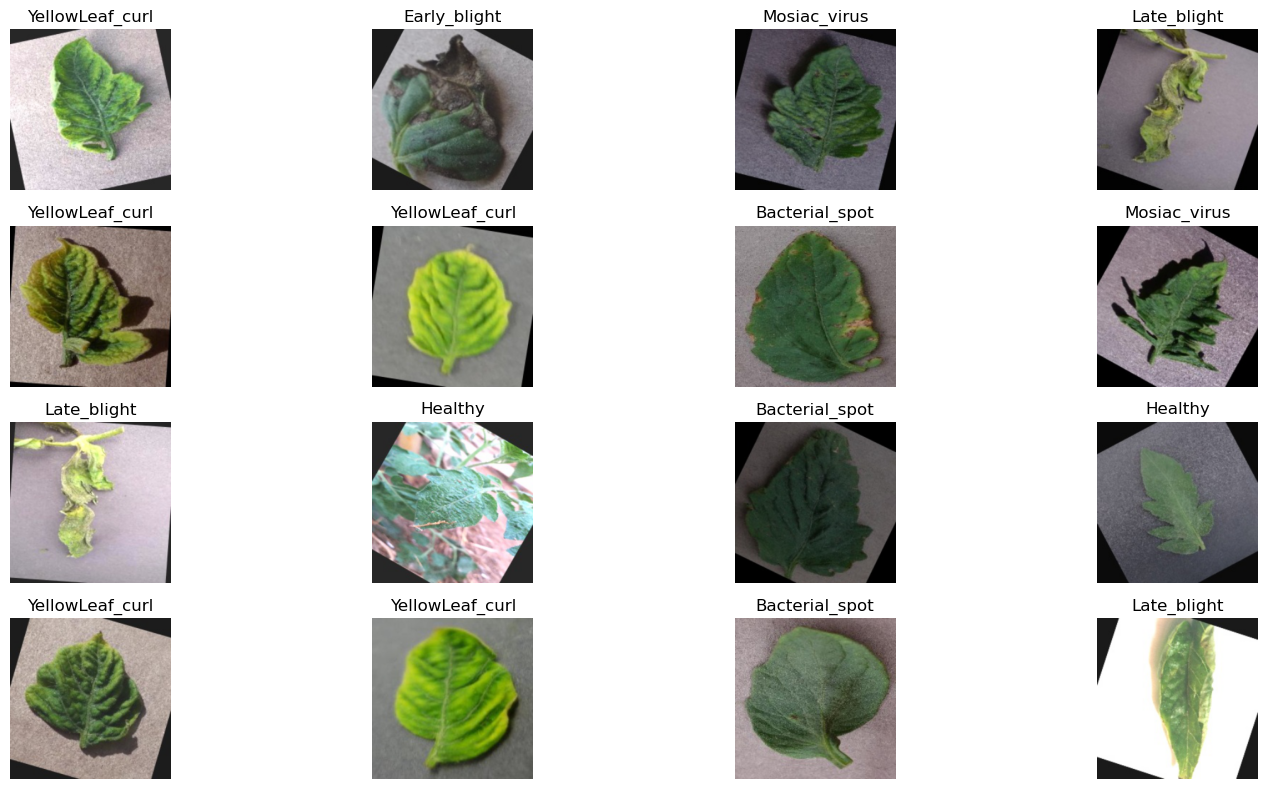

In [11]:
# Get a batch of data
inputs, labels = next(iter(dataloader))

# Define the class names
class_names = dataloader.dataset.classes

# Plot the images
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
for i in range(4):
    for j in range(4):
        idx = i * 8 + j
        image = inputs[idx].numpy().transpose((1, 2, 0))
        label = labels[idx]
        class_name = class_names[label]
        axes[i][j].imshow(image)
        axes[i][j].axis('off')
        axes[i][j].set_title(class_name)
plt.tight_layout()
plt.show()


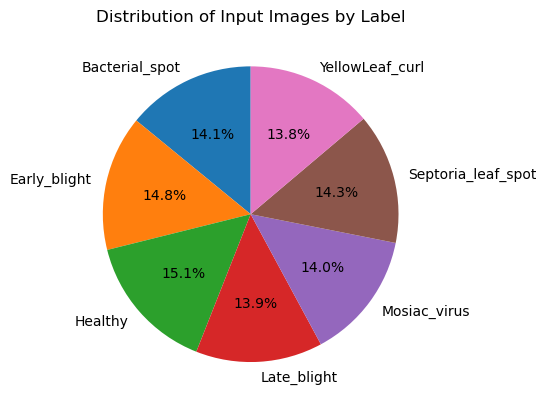

In [12]:
import matplotlib.pyplot as plt

# Count the number of input images for each label
label_counts = {}
for inputs, labels in dataloader:
    for label in labels:
        label = label.item()
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Get the class names and counts
class_names = dataloader.dataset.classes
counts = [label_counts[i] for i in range(len(class_names))]

# Create a pie chart
plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Input Images by Label')

# Show the plot
plt.show()


In [13]:
label_counts

{3: 1985, 6: 1980, 1: 2120, 5: 2045, 0: 2015, 4: 2005, 2: 2165}

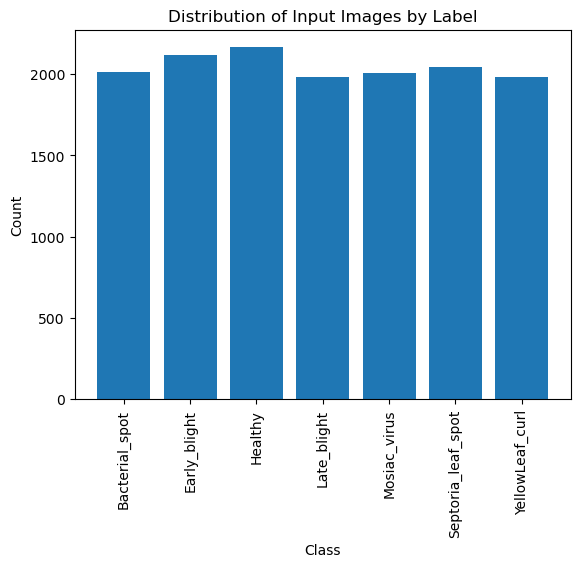

In [14]:
# Create a histogram
plt.bar(class_names, counts)

# Add labels and a title
plt.xlabel('Class')
plt.tick_params(axis='x', labelrotation=90)
plt.ylabel('Count')
plt.title('Distribution of Input Images by Label')

# Show the plot
plt.show()

In [ ]:
# Convolution Filters Images

In [15]:
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding='same'):
        """
        This function initializes the parameters for a conv2D layer

        Parameters
        ------------
        in_channels : int
        Number of channels in the input image

        out_channels : int
        Number of channels produced by the convolution

        kernel_size : int or tuple
        Size of the convolving kernel 

        stride : int or tuple
        Stride of the convolution. Default: 1

        padding: int, tuple or str
        Padding added to all four sides of the input. Default: 'same'
        """
        super(Conv2D, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = stride
        self.padding = padding

        self.weight = nn.Parameter(
            torch.nn.init.xavier_uniform_(
                torch.empty(
                    (self.out_channels, self.in_channels, *self.kernel_size),
                    requires_grad=True
                )
            )
        )
        self.bias = nn.Parameter(
            torch.zeros((self.out_channels,), requires_grad=True)
        )

    def forward(self, x):
        """
        This function performs convolution operation on the input
        Parameters
        ------------
        x : tensor, float32
        Input image to the convolution layer

        Returns
        ------------
        x : tensor, float32
        feature map output from the last layer
        """
        x = F.conv2d(x,self.weight,self.bias,padding=self.padding,stride=self.stride)
        x = F.relu(x)
        return x

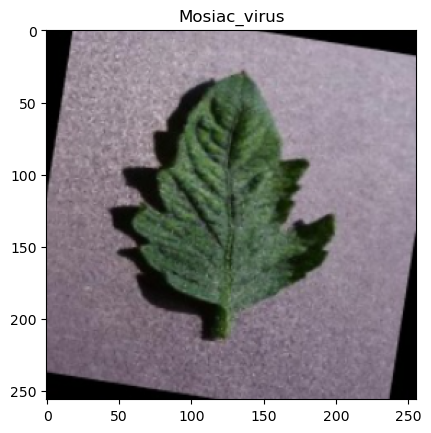

In [16]:


# Take first image from tensor input
image = inputs[0].numpy().transpose((1,2,0))
label = labels[0]
class_name = class_names[label]
plt.imshow(image)
plt.title(class_name)
plt.show()

In [17]:
def plot_image_from_filter(output):
    # Reshape the tensor to a 4D tensor with a batch size of 1
    batch_size = 1
    n_filters, height, width = output.shape
    conv_output = output.view(batch_size, n_filters, height, width)

    # Plot the images
    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i in range(4):
        for j in range(4):
            idx = i * 4 + j
            image = conv_output[0, idx].detach().numpy()
            axes[i][j].imshow(image)
            axes[i][j].axis('off')
    plt.tight_layout()
    plt.show()

In [18]:
input_image = inputs[0]
# first conv2d layer
conv = Conv2D(3,16,3)
output = conv.forward(input_image)
output.shape

torch.Size([16, 256, 256])

In [19]:
input_image.shape

torch.Size([3, 256, 256])

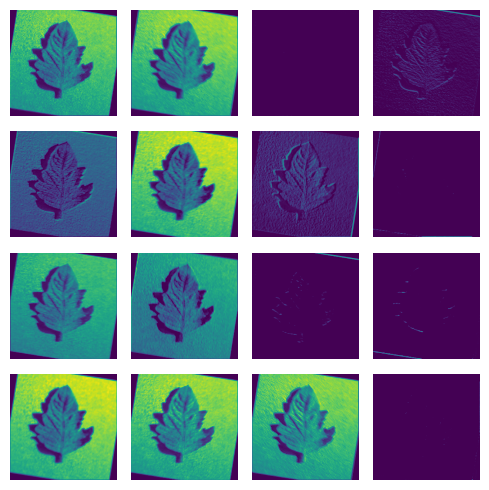

In [20]:
plot_image_from_filter(output)

In [21]:
output.shape

torch.Size([16, 256, 256])

In [22]:
output = output.unsqueeze(0)
output.shape

torch.Size([1, 16, 256, 256])

In [23]:

class MaxPool(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        """
        This function initializes the parameters for a maxpool layer

        Parameters
        ------------
        kernel_size : int
        window height and width for the maxpooling window

        stride : int
        the stride of the window. Default value is kernel_size

        padding: int
        implicit zero padding to be added on both sides
        """
        super(MaxPool, self).__init__()
        self.kernel_size = kernel_size
        self.stride = kernel_size if stride is None else stride
        self.padding = padding


    def forward(self, x): 
        """
        This function performs max-pool operation on the input

        Parameters
        ------------
        x : tensor, float32
        Input image to the convolution layer

        Returns
        ------------
        x : tensor, float32
        max-pooled output from the last layer
        """
        x = F.max_pool2d(x,kernel_size=self.kernel_size,padding=self.padding,
                         stride=self.stride)
        return x

In [24]:
# second conv2d layer
max1 = MaxPool(2)
output = conv.forward(input_image)
output.shape

torch.Size([16, 256, 256])

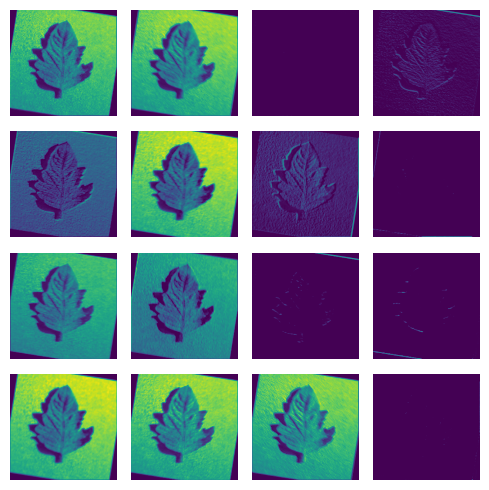

In [25]:
plot_image_from_filter(output)